<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  214 non-null    float64
 1   Review  88 non-null     object 
dtypes: float64(1), object(1)
memory usage: 3.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, 0 to 226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  88 non-null     float64
 1   Review  88 non-null     object 
dtypes: float64(1), object(1)
memory usage: 2.1+ KB


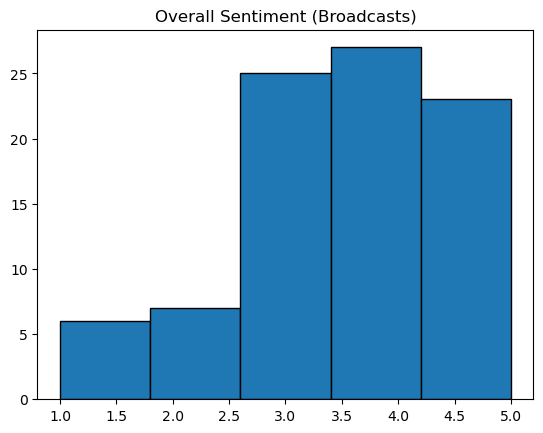

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rhseb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('casters', 24), ('stream', 23), ('would', 20), ('teams', 18), ('like', 14)]


,Rating,Review,Tokens,Filtered_Tokens,Lemmatized_Tokens,TFIDF_Tokens
0,3.0,would be nice to see lower tier teams getting ...,"[would, be, nice, to, see, lower, tier, teams,...","[would, nice, see, lower, tier, teams, getting...","[would, nice, see, lower, tier, team, get, str...",would nice see lower tier team get stream time...
5,3.0,don t watch often enough to have an opinion,"[don, t, watch, often, enough, to, have, an, o...","[watch, often, enough, opinion]","[watch, often, enough, opinion]",watch often enough opinion
10,4.0,pretty good one of the best things at necc,"[pretty, good, one, of, the, best, things, at,...","[pretty, good, one, best, things, necc]","[pretty, good, one, best, things, necc]",pretty good one best things necc
13,3.0,overall i liked the broadcasts however there c...,"[overall, i, liked, the, broadcasts, however, ...","[overall, liked, broadcasts, however, could, c...","[overall, like, broadcast, however, could, com...",overall like broadcast however could communica...
14,3.0,should try and have castors at all times,"[should, try, and, have, castors, at, all, times]","[try, castors, times]","[try, castors, time]",try castors time
19,2.0,feel like the streaming is unorganized at time...,"[feel, like, the, streaming, is, unorganized, ...","[feel, like, streaming, unorganized, times, we...","[feel, like, stream, unorganized, time, weird,...",feel like stream unorganized time weird random...
22,5.0,broadcasts are really creative and good,"[broadcasts, are, really, creative, and, good]","[broadcasts, really, creative, good]","[broadcast, really, creative, good]",broadcast really creative good
23,4.0,we weren t streamed this year i d love to see ...,"[we, weren, t, streamed, this, year, i, d, lov...","[streamed, year, love, see, lower, divisions, ...","[stream, year, love, see, lower, divisions, ge...",stream year love see lower divisions get strea...
25,3.0,would be great to see a larger variety of prog...,"[would, be, great, to, see, a, larger, variety...","[would, great, see, larger, variety, programs,...","[would, great, see, larger, variety, program, ...",would great see larger variety program feature
30,4.0,no,[no],[],[],


In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk

#Loading The Dataset
df = pd.read_csv('NECC Broadcast Reviews.csv')

#Seeing The Data
df.head(10)

#Basic EDA
df.info()

#Identifying Null Reviews
df.isnull().sum()

#Removing Null Reviews
df = df.dropna(subset=['Review'])
df.info()

#Showing The Overall Sentiment
x = df['Rating']
plt.hist(x, bins=5, edgecolor='black')
plt.title("Overall Sentiment (Broadcasts)")
plt.show()

#Removing Stop Words
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text) 
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) 
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

df['Review'] = df['Review'].apply(clean_text)

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
nltk.download('wordnet')

def tokenize_text(text):
    tokens = word_tokenize(text) 
    return tokens  

df['Tokens'] = df['Review'].apply(tokenize_text)

from nltk.corpus import stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]

df['Filtered_Tokens'] = df['Tokens'].apply(remove_stopwords)

from collections import Counter 
all_filtered_tokens = [word for tokens in df['Filtered_Tokens'] for word in tokens]
word_counts_after_removal = Counter(all_filtered_tokens)
most_common_words_after_removal = word_counts_after_removal.most_common(5)
print(most_common_words_after_removal)

from nltk.stem import WordNetLemmatizer

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

df['Lemmatized_Tokens'] = df['Filtered_Tokens'].apply(lemmatize_tokens)

from sklearn.feature_extraction.text import TfidfVectorizer

#performing TF-IDF vectorization
def apply_tfidf(df):
    df['TFIDF_Tokens'] = df['Lemmatized_Tokens'].apply(lambda x: ' '.join(x))
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['TFIDF_Tokens'])
    feature_names = tfidf_vectorizer.get_feature_names_out()
    return tfidf_matrix, feature_names

# Applying TF-IDF on our Dataframe
tfidf_matrix, feature_names = apply_tfidf(df)
df.head(10)